In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import os


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


os.makedirs('data', exist_ok=True)
os.makedirs('outputs', exist_ok=True)
os.makedirs('models', exist_ok=True)


'/Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/data/Dementia Prediction Dataset copy.csv'

In [30]:
data_path = '/Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/data/Dementia Prediction Dataset copy.csv'


df = pd.read_csv(data_path)




df.head()
 

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,NACCNINR,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCOM,NACCOMX,NACCOMS,NACCOMSX,NACCFADM,NACCFFTD,ANYMEDS,DRUG1,DRUG2,DRUG3,DRUG4,DRUG5,DRUG6,DRUG7,DRUG8,DRUG9,DRUG10,DRUG11,DRUG12,DRUG13,DRUG14,DRUG15,DRUG16,DRUG17,DRUG18,DRUG19,DRUG20,DRUG21,DRUG22,DRUG23,DRUG24,DRUG25,DRUG26,DRUG27,DRUG28,DRUG29,DRUG30,DRUG31,DRUG32,DRUG33,DRUG34,DRUG35,DRUG36,DRUG37,DRUG38,DRUG39,DRUG40,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CVOTHRX,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,NCOTHRX,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHTYPX,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,OTHSLEEX,ALCOHOL,ABUSOTHR,ABUSX,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,PDNORMAL,SPEECH,SPEECHX,FACEXP,FACEXPX,TRESTFAC,TRESTFAX,TRESTRHD,TRESTRHX,TRESTLHD,TRESTLHX,TRESTRFT,TRESTRFX,TRESTLFT,TRESTLFX,TRACTRHD,TRACTRHX,TRACTLHD,TRACTLHX,RIGDNECK,RIGDNEX,RIGDUPRT,RIGDUPRX,RIGDUPLF,RIGDUPLX,RIGDLORT,RIGDLORX,RIGDLOLF,RIGDLOLX,TAPSRT,TAPSRTX,TAPSLF,TAPSLFX,HANDMOVR,HANDMVRX,HANDMOVL,HANDMVLX,HANDALTR,HANDATRX,HANDALTL,HANDATLX,LEGRT,LEGRTX,LEGLF,LEGLFX,ARISING,ARISINGX,POSTURE,POSTUREX,GAIT,GAITX,POSSTAB,POSSTABX,BRADYKIN,BRADYKIX,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,OTHNEURX,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,COGOTHRX,NACCCOGF,NACCCGFX,COGMODE,COGMODEX,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,BEOTHRX,NACCBEHF,NACCBEFX,BEMODE,BEMODEX,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMODEX,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSELANX,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,NPSYLANX,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCALANX,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFL

In [31]:
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,NACCCORE,NACCREAS,NACCREFR,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,HISPORX,RACE,RACEX,RACESEC,RACESECX,RACETER,RACETERX,PRIMLANG,PRIMLANX,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INHISPOX,NACCNINR,INRACE,INRACEX,INRASEC,INRASECX,INRATER,INRATERX,INEDUC,INRELTO,INRELTOX,INKNOWN,INLIVWTH,INVISITS,INCALLS,INRELY,NACCFAM,NACCMOM,NACCDAD,NACCAM,NACCAMX,NACCAMS,NACCAMSX,NACCFM,NACCFMX,NACCFMS,NACCFMSX,NACCOM,NACCOMX,NACCOMS,NACCOMSX,NACCFADM,NACCFFTD,ANYMEDS,DRUG1,DRUG2,DRUG3,DRUG4,DRUG5,DRUG6,DRUG7,DRUG8,DRUG9,DRUG10,DRUG11,DRUG12,DRUG13,DRUG14,DRUG15,DRUG16,DRUG17,DRUG18,DRUG19,DRUG20,DRUG21,DRUG22,DRUG23,DRUG24,DRUG25,DRUG26,DRUG27,DRUG28,DRUG29,DRUG30,DRUG31,DRUG32,DRUG33,DRUG34,DRUG35,DRUG36,DRUG37,DRUG38,DRUG39,DRUG40,TOBAC30,TOBAC100,SMOKYRS,PACKSPER,QUITSMOK,ALCOCCAS,ALCFREQ,CVHATT,HATTMULT,HATTYEAR,CVAFIB,CVANGIO,CVBYPASS,CVPACDEF,CVPACE,CVCHF,CVANGINA,CVHVALVE,CVOTHR,CVOTHRX,CBSTROKE,STROKMUL,NACCSTYR,CBTIA,TIAMULT,NACCTIYR,PD,PDYR,PDOTHR,PDOTHRYR,SEIZURES,NACCTBI,TBI,TBIBRIEF,TRAUMBRF,TBIEXTEN,TRAUMEXT,TBIWOLOS,TRAUMCHR,TBIYEAR,NCOTHR,NCOTHRX,DIABETES,DIABTYPE,HYPERTEN,HYPERCHO,B12DEF,THYROID,ARTHRIT,ARTHTYPE,ARTHTYPX,ARTHUPEX,ARTHLOEX,ARTHSPIN,ARTHUNK,INCONTU,INCONTF,APNEA,RBD,INSOMN,OTHSLEEP,OTHSLEEX,ALCOHOL,ABUSOTHR,ABUSX,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,HEIGHT,WEIGHT,BPSYS,BPDIAS,HRATE,VISION,VISCORR,VISWCORR,HEARING,HEARAID,HEARWAID,ABRUPT,STEPWISE,SOMATIC,EMOT,HXHYPER,HXSTROKE,FOCLSYM,FOCLSIGN,HACHIN,CVDCOG,STROKCOG,CVDIMAG,CVDIMAG1,CVDIMAG2,CVDIMAG3,CVDIMAG4,CVDIMAGX,PDNORMAL,SPEECH,SPEECHX,FACEXP,FACEXPX,TRESTFAC,TRESTFAX,TRESTRHD,TRESTRHX,TRESTLHD,TRESTLHX,TRESTRFT,TRESTRFX,TRESTLFT,TRESTLFX,TRACTRHD,TRACTRHX,TRACTLHD,TRACTLHX,RIGDNECK,RIGDNEX,RIGDUPRT,RIGDUPRX,RIGDUPLF,RIGDUPLX,RIGDLORT,RIGDLORX,RIGDLOLF,RIGDLOLX,TAPSRT,TAPSRTX,TAPSLF,TAPSLFX,HANDMOVR,HANDMVRX,HANDMOVL,HANDMVLX,HANDALTR,HANDATRX,HANDALTL,HANDATLX,LEGRT,LEGRTX,LEGLF,LEGLFX,ARISING,ARISINGX,POSTURE,POSTUREX,GAIT,GAITX,POSSTAB,POSSTABX,BRADYKIN,BRADYKIX,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRSUM,CDRGLOB,COMPORT,CDRLANG,NPIQINF,NPIQINFX,DEL,DELSEV,HALL,HALLSEV,AGIT,AGITSEV,DEPD,DEPDSEV,ANX,ANXSEV,ELAT,ELATSEV,APA,APASEV,DISN,DISNSEV,IRR,IRRSEV,MOT,MOTSEV,NITE,NITESEV,APP,APPSEV,NOGDS,SATIS,DROPACT,EMPTY,BORED,SPIRITS,AFRAID,HAPPY,HELPLESS,STAYHOME,MEMPROB,WONDRFUL,WRTHLESS,ENERGY,HOPELESS,BETTER,NACCGDS,BILLS,TAXES,SHOPPING,GAMES,STOVE,MEALPREP,EVENTS,PAYATTN,REMDATES,TRAVEL,NACCNREX,NORMEXAM,FOCLDEF,GAITDIS,EYEMOVE,PARKSIGN,RESTTRL,RESTTRR,SLOWINGL,SLOWINGR,RIGIDL,RIGIDR,BRADY,PARKGAIT,POSTINST,CVDSIGNS,CORTDEF,SIVDFIND,CVDMOTL,CVDMOTR,CORTVISL,CORTVISR,SOMATL,SOMATR,POSTCORT,PSPCBS,EYEPSP,DYSPSP,AXIALPSP,GAITPSP,APRAXSP,APRAXL,APRAXR,CORTSENL,CORTSENR,ATAXL,ATAXR,ALIENLML,ALIENLMR,DYSTONL,DYSTONR,MYOCLLT,MYOCLRT,ALSFIND,GAITNPH,OTHNEUR,OTHNEURX,B9CHG,DECSUB,DECIN,DECCLIN,DECCLCOG,COGMEM,COGORI,COGJUDG,COGLANG,COGVIS,COGATTN,COGFLUC,COGFLAGO,COGOTHR,COGOTHRX,NACCCOGF,NACCCGFX,COGMODE,COGMODEX,DECAGE,DECCLBE,BEAPATHY,BEDEP,BEVHALL,BEVWELL,BEVHAGO,BEAHALL,BEDEL,BEDISIN,BEIRRIT,BEAGIT,BEPERCH,BEREM,BEREMAGO,BEANX,BEOTHR,BEOTHRX,NACCBEHF,NACCBEFX,BEMODE,BEMODEX,BEAGE,DECCLMOT,MOGAIT,MOFALLS,MOTREM,MOSLOW,NACCMOTF,MOMODE,MOMODEX,MOMOPARK,PARKAGE,MOMOALS,ALSAGE,MOAGE,COURSE,FRSTCHG,LBDEVAL,FTLDEVAL,MMSECOMP,MMSELOC,MMSELAN,MMSELANX,MMSEVIS,MMSEHEAR,MMSEORDA,MMSEORLO,PENTAGON,NACCMMSE,NPSYCLOC,NPSYLAN,NPSYLANX,LOGIMO,LOGIDAY,LOGIYR,LOGIPREV,LOGIMEM,MEMUNITS,MEMTIME,UDSBENTC,UDSBENTD,UDSBENRS,DIGIF,DIGIFLEN,DIGIB,DIGIBLEN,ANIMALS,VEG,TRAILA,TRAILARR,TRAILALI,TRAILB,TRAILBRR,TRAILBLI,WAIS,BOSTON,UDSVERFC,UDSVERFN,UDSVERNF,UDSVERLC,UDSVERLR,UDSVERLN,UDSVERTN,UDSVERTE,UDSVERTI,COGSTAT,NACCC1,MOCACOMP,MOCAREAS,MOCALOC,MOCALAN,MOCALANX,MOCAVIS,MOCAHEAR,MOCATOTS,MOCATRAI,MOCACUBE,MOCACLOC,MOCACLON,MOCACLOH,MOCANAMI,MOCAREGI,MOCADIGI,MOCALETT,MOCASER7,MOCAREPE,MOCAFL

In [32]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195196 entries, 0 to 195195
Columns: 1024 entries, NACCID to NPATGFR4
dtypes: float64(135), int64(747), object(142)
memory usage: 1.5+ GB


In [33]:
print(f"📋 All columns ({len(df.columns)} total):\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:4d}. {col}")

📋 All columns (1024 total):

   1. NACCID
   2. NACCADC
   3. PACKET
   4. FORMVER
   5. VISITMO
   6. VISITDAY
   7. VISITYR
   8. NACCVNUM
   9. NACCAVST
  10. NACCNVST
  11. NACCDAYS
  12. NACCFDYS
  13. NACCCORE
  14. NACCREAS
  15. NACCREFR
  16. BIRTHMO
  17. BIRTHYR
  18. SEX
  19. HISPANIC
  20. HISPOR
  21. HISPORX
  22. RACE
  23. RACEX
  24. RACESEC
  25. RACESECX
  26. RACETER
  27. RACETERX
  28. PRIMLANG
  29. PRIMLANX
  30. EDUC
  31. MARISTAT
  32. NACCLIVS
  33. INDEPEND
  34. RESIDENC
  35. HANDED
  36. INBIRMO
  37. INBIRYR
  38. INSEX
  39. NEWINF
  40. INHISP
  41. INHISPOR
  42. INHISPOX
  43. NACCNINR
  44. INRACE
  45. INRACEX
  46. INRASEC
  47. INRASECX
  48. INRATER
  49. INRATERX
  50. INEDUC
  51. INRELTO
  52. INRELTOX
  53. INKNOWN
  54. INLIVWTH
  55. INVISITS
  56. INCALLS
  57. INRELY
  58. NACCFAM
  59. NACCMOM
  60. NACCDAD
  61. NACCAM
  62. NACCAMX
  63. NACCAMS
  64. NACCAMSX
  65. NACCFM
  66. NACCFMX
  67. NACCFMS
  68. NACCFMSX
  69. NACCOM
  7

In [34]:
NON_MEDICAL_FEATURES = {
    

    'visit_info': [
        'NACCID', 'NACCADC', 'PACKET', 'FORMVER',
        'VISITMO', 'VISITDAY', 'VISITYR',
        'NACCVNUM', 'NACCAVST', 'NACCNVST', 'NACCDAYS', 'NACCFDYS',
    ],
    
   
    'subject_demographics': [
        # Birth & Age
        'BIRTHMO', 'BIRTHYR', 'NACCAGE', 'NACCAGEB',
        # Sex
        'SEX',
        # Race & Ethnicity
        'HISPANIC', 'HISPOR', 'HISPORX',
        'RACE', 'RACEX', 'RACESEC', 'RACESECX', 'RACETER', 'RACETERX',
        'NACCNIHR',
        # Language
        'PRIMLANG', 'PRIMLANX',
        # Education - KEY PREDICTOR
        'EDUC',
        # Marital & Living - KEY PREDICTORS
        'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC',
        # Other
        'HANDED', 'NACCREAS', 'NACCREFR',
    ],
    
    # Co-participant Demographics (FORM A2)
    'coparticipant_demographics': [
        'INBIRMO', 'INBIRYR', 'INSEX', 'NEWINF',
        'INHISP', 'INHISPOR', 'INHISPOX',
        'INRACE', 'INRACEX', 'INRASEC', 'INRASECX', 'INRATER', 'INRATERX',
        'INEDUC', 'INRELTO', 'INRELTOX', 'INKNOWN', 'INLIVWTH',
    ],
    
    # Family History (FORM A3) - CRITICAL
    'family_history': [
        'NACCFAM', 'NACCMOM', 'NACCDAG', 'NACCFAD',
        'NACCFADM', 'NACCAM', 'NACCAMX', 'NACCAMS', 'NACCAMSX',
        'NACCFFTD', 'NACCFM', 'NACCFMX', 'NACCFMS', 'NACCFMSX',
    ],
    
    # Other NACC Derived
    'nacc_derived': [
        'NACCBMI', 'NACCUDSD',
    ],
}


ALL_NON_MEDICAL = []
for category, features in NON_MEDICAL_FEATURES.items():
    ALL_NON_MEDICAL.extend(features)


for category, features in NON_MEDICAL_FEATURES.items():
    print(f"  - {category}: {len(features)} features")

  - visit_info: 12 features
  - subject_demographics: 25 features
  - coparticipant_demographics: 18 features
  - family_history: 14 features
  - nacc_derived: 2 features


In [35]:
available_features = [f for f in ALL_NON_MEDICAL if f in df.columns]
missing_features = [f for f in ALL_NON_MEDICAL if f not in df.columns]


if missing_features:
    print(f"\n  Missing features (first 20):")
    for feat in missing_features[:20]:
        print(f"     - {feat}")

print(f"\nAvailable non-medical features:")
for i, feat in enumerate(available_features, 1):
    print(f"{i:3d}. {feat}")


  Missing features (first 20):
     - NACCDAG
     - NACCFAD

Available non-medical features:
  1. NACCID
  2. NACCADC
  3. PACKET
  4. FORMVER
  5. VISITMO
  6. VISITDAY
  7. VISITYR
  8. NACCVNUM
  9. NACCAVST
 10. NACCNVST
 11. NACCDAYS
 12. NACCFDYS
 13. BIRTHMO
 14. BIRTHYR
 15. NACCAGE
 16. NACCAGEB
 17. SEX
 18. HISPANIC
 19. HISPOR
 20. HISPORX
 21. RACE
 22. RACEX
 23. RACESEC
 24. RACESECX
 25. RACETER
 26. RACETERX
 27. NACCNIHR
 28. PRIMLANG
 29. PRIMLANX
 30. EDUC
 31. MARISTAT
 32. NACCLIVS
 33. INDEPEND
 34. RESIDENC
 35. HANDED
 36. NACCREAS
 37. NACCREFR
 38. INBIRMO
 39. INBIRYR
 40. INSEX
 41. NEWINF
 42. INHISP
 43. INHISPOR
 44. INHISPOX
 45. INRACE
 46. INRACEX
 47. INRASEC
 48. INRASECX
 49. INRATER
 50. INRATERX
 51. INEDUC
 52. INRELTO
 53. INRELTOX
 54. INKNOWN
 55. INLIVWTH
 56. NACCFAM
 57. NACCMOM
 58. NACCFADM
 59. NACCAM
 60. NACCAMX
 61. NACCAMS
 62. NACCAMSX
 63. NACCFFTD
 64. NACCFM
 65. NACCFMX
 66. NACCFMS
 67. NACCFMSX
 68. NACCBMI
 69. NACCUDSD


In [36]:
with open('outputs/available_nonmedical_features.txt', 'w') as f:
    f.write("Available Non-Medical Features\n")
    f.write("="*50 + "\n\n")
    for i, feat in enumerate(available_features, 1):
        f.write(f"{i:3d}. {feat}\n")



In [37]:
TARGET_CANDIDATES = [
    'DEMENTED',     # Binary: 0=Normal, 1=Demented
    'NORMCOG',      # Binary: 1=Normal cognition
    'NACCALZD',     # Alzheimer's disease
    'NACCALZP',     # Probable AD
    'CDRGLOB',      # CDR Global score
    'NACCCOGF',     # Cognitive status
]

TARGET = None


for candidate in TARGET_CANDIDATES:
    if candidate in df.columns:
        print(f"✓ Found: {candidate}")
        value_counts = df[candidate].value_counts()
        print(f"  Values: {value_counts.to_dict()}")
        print(f"  Missing: {df[candidate].isna().sum()} ({df[candidate].isna().sum()/len(df)*100:.1f}%)")
        print()
        
        if TARGET is None and candidate == 'DEMENTED':
            TARGET = candidate


if TARGET is None:
    for candidate in TARGET_CANDIDATES:
        if candidate in df.columns:
            TARGET = candidate
            break


if TARGET is None and 'CDRGLOB' in df.columns:
    print("⚙️  Creating binary target from CDRGLOB")
    print("   0 = Normal, 0.5+ = Impaired")
    df['DEMENTIA_BINARY'] = (df['CDRGLOB'] >= 0.5).astype(int)
    TARGET = 'DEMENTIA_BINARY'

if TARGET is None:
    print(" ERROR: Could not find target variable!")
else:
    print(f"\n Selected target: {TARGET}")
    print(f"   Distribution: {df[TARGET].value_counts().to_dict()}")

✓ Found: DEMENTED
  Values: {0: 137606, 1: 57590}
  Missing: 0 (0.0%)

✓ Found: NORMCOG
  Values: {0: 100263, 1: 94933}
  Missing: 0 (0.0%)

✓ Found: NACCALZD
  Values: {8: 94933, 1: 67754, 0: 32509}
  Missing: 0 (0.0%)

✓ Found: NACCALZP
  Values: {8: 94933, 1: 64116, 7: 32509, 2: 3598, 3: 40}
  Missing: 0 (0.0%)

✓ Found: CDRGLOB
  Values: {0.0: 93620, 0.5: 56793, 1.0: 23389, 2.0: 12279, 3.0: 9107, 99.0: 8}
  Missing: 0 (0.0%)

✓ Found: NACCCOGF
  Values: {0: 97476, 1: 74482, 3: 8152, 4: 7121, 99: 2643, 6: 2513, 5: 1759, 8: 450, 2: 428, 7: 172}
  Missing: 0 (0.0%)


 Selected target: DEMENTED
   Distribution: {0: 137606, 1: 57590}


In [38]:
df_work = df[available_features + [TARGET]].copy()


initial_count = len(df_work)
df_work = df_work[df_work[TARGET].notna()]
removed_count = initial_count - len(df_work)


print(f"   - Initial rows: {initial_count:,}")
print(f"   - Removed (missing target): {removed_count:,}")
print(f"   - Final rows: {len(df_work):,}")
print(f"   - Features: {len(available_features)}")
print(f"   - Target: {TARGET}")

   - Initial rows: 195,196
   - Removed (missing target): 0
   - Final rows: 195,196
   - Features: 69
   - Target: DEMENTED


In [41]:

df_work.describe()

,NACCADC,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,NACCDAYS,NACCFDYS,BIRTHMO,BIRTHYR,NACCAGE,NACCAGEB,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,NACCNIHR,PRIMLANG,EDUC,MARISTAT,NACCLIVS,INDEPEND,RESIDENC,HANDED,NACCREAS,NACCREFR,INBIRMO,INBIRYR,INSEX,NEWINF,INHISP,INHISPOR,INRACE,INRASEC,INRATER,INEDUC,INRELTO,INKNOWN,INLIVWTH,NACCFAM,NACCMOM,NACCFADM,NACCAM,NACCAMS,NACCFFTD,NACCFM,NACCFMS,NACCBMI,NACCUDSD,DEMENTED
count,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000,195196.000000
mean,4999.759252,2.355919,6.364260,15.437145,2014.374101,3.820965,6.641929,5.774811,2434.066963,1203.667380,6.534693,1939.533054,74.369111,71.075447,1.580996,0.101349,82.340366,2.257997,85.881376,87.598895,2.655239,1.177130,15.975163,1.777741,2.005036,1.535718,1.293008,1.977208,1.551313,3.474067,8.859275,2094.887477,1.421797,-1.132129,-2.685839,22.483386,-1.397472,24.152611,24.716183,3.764616,1.690019,6.437063,0.404470,1.243694,0.510241,0.003786,2.819125,1.916709,0.007685,2.808920,1.908861,83.588301,2.278453,0.295037
std,2980.944552,0.698246,3.395659,8.606407,5.331593,3.100083,4.248845,3.955649,1778.039584,1304.934417,3.454612,11.795708,10.303045,9.872751,0.493397,0.583779,21.175870,8.297401,13.472449,6.434066,11.153973,0.929809,6.700796,1.290757,0.901166,0.966394,1.099664,0.599955,1.478140,3.041807,16.221464,1407.977519,1.231945,1.880177,2.032044,41.455778,9.227510,42.395333,42.696827,16.249043,1.832496,74.559584,1.044068,2.387189,1.407992,0.061414,5.821496,6.464159,0.087325,5.815455,6.456962,221.819402,1.328041,0.456060
min,186.000000,1.000000,1.000000,1.000000,2005.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1896.000000,18.000000,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,-4.000000,1.000000,0.000000
25%,2289.000000,2.000000,3.000000,8.000000,2010.000000,1.000000,3.000000,3.000000,1031.000000,0.000000,3.000000,1931.000000,68.000000,65.000000,1.000000,0.000000,88.000000,1.000000,88.000000,88.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1938.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,-4.000000,0.000000,-4.000000,-4.000000,22.100000,1.000000,0.000000
50%,4967.000000,2.000000,6.000000,15.000000,2014.000000,3.000000,6.000000,5.000000,2155.000000,782.000000,7.000000,1939.000000,75.000000,72.000000,2.000000,0.000000,88.000000,1.000000,88.000000,88.000000,1.000000,1.000000,16.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,7.000000,1948.000000,2.000000,0.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,-4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,-4.000000,25.800000,2.000000,0.000000
75%,8361.000000,3.000000,9.000000,23.000000,2019.000000,5.000000,9.000000,8.000000,3678.000000,1842.000000,10.000000,1947.000000,81.000000,78.000000,2.000000,0.000000,88.000000,1.000000,88.000000,8

In [42]:
print(f" Target Variable: {TARGET}\n")
print("Distribution:")
print(df_work[TARGET].value_counts())
print(f"\nPercentages:")
print(df_work[TARGET].value_counts(normalize=True) * 100)

 Target Variable: DEMENTED

Distribution:
DEMENTED
0    137606
1     57590
Name: count, dtype: int64

Percentages:
DEMENTED
0    70.496322
1    29.503678
Name: proportion, dtype: float64


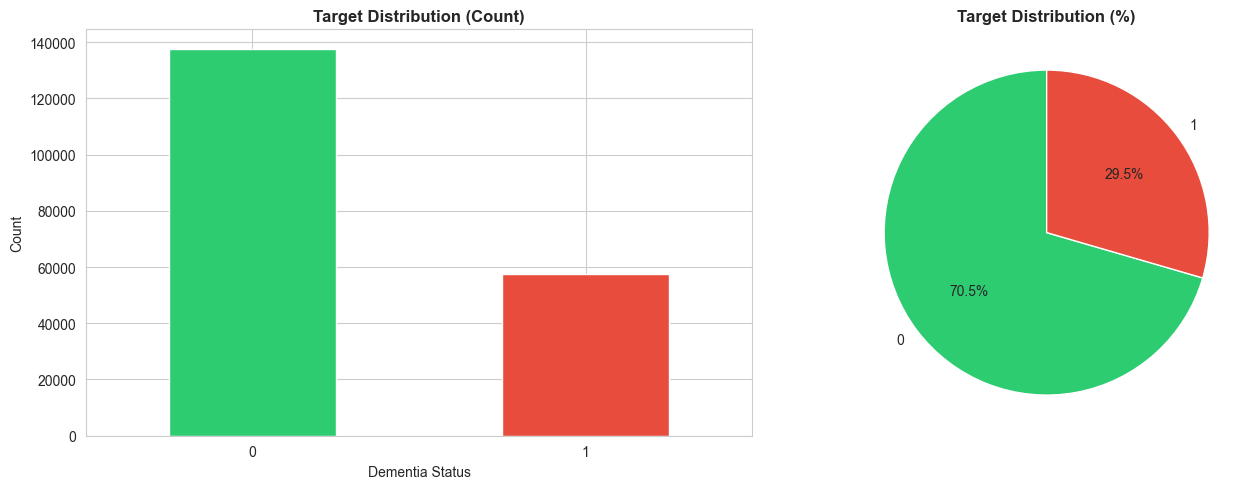

 Saved: outputs/01_target_distribution.png


In [43]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))


df_work[TARGET].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Dementia Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)


df_work[TARGET].value_counts().plot(
    kind='pie', ax=axes[1], autopct='%1.1f%%',
    colors=['#2ecc71', '#e74c3c'], startangle=90
)
axes[1].set_title('Target Distribution (%)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('outputs/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Saved: outputs/01_target_distribution.png")

In [44]:
class_balance = df_work[TARGET].value_counts(normalize=True)
min_class_pct = class_balance.min() * 100

print(f"\n⚖️  Class Balance Check:")
print(f"   Minority class: {min_class_pct:.1f}%")

if min_class_pct < 30:
    print(f"   ⚠️  WARNING: Class imbalance detected!")
    print(f"   Consider using SMOTE or class weights.")
else:
    print(f"   Classes are reasonably balanced.")


⚖️  Class Balance Check:
   Minority class: 29.5%
   ⚠️  WARNING: Class imbalance detected!
   Consider using SMOTE or class weights.


In [45]:
missing_stats = pd.DataFrame({
    'Column': df_work.columns,
    'Missing_Count': df_work.isnull().sum(),
    'Missing_Percentage': (df_work.isnull().sum() / len(df_work) * 100).round(2)
}).sort_values('Missing_Percentage', ascending=False)

print("\n Missing Values Summary:")
print(f"   Total cells: {df_work.shape[0] * df_work.shape[1]:,}")
print(f"   Missing cells: {df_work.isnull().sum().sum():,}")
print(f"   Overall missing: {(df_work.isnull().sum().sum() / (df_work.shape[0] * df_work.shape[1]) * 100):.2f}%")

print(f"\nTop 10 columns with missing data:")
print(missing_stats[missing_stats['Missing_Count'] > 0].head(10))


 Missing Values Summary:
   Total cells: 13,663,720
   Missing cells: 2,621,521
   Overall missing: 19.19%

Top 10 columns with missing data:
            Column  Missing_Count  Missing_Percentage
RACETERX  RACETERX         195160               99.98
INRATERX  INRATERX         195137               99.97
INHISPOX  INHISPOX         194958               99.88
INRASECX  INRASECX         194899               99.85
RACESECX  RACESECX         194813               99.80
HISPORX    HISPORX         194669               99.73
INRELTOX  INRELTOX         193644               99.20
INRACEX    INRACEX         193608               99.19
RACEX        RACEX         192851               98.80
PRIMLANX  PRIMLANX         192464               98.60


In [46]:
print("\n Data Types:")
print(df_work.dtypes.value_counts())

numerical_cols = df_work.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_work.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n   - Numerical: {len(numerical_cols)}")
print(f"   - Categorical: {len(categorical_cols)}")


 Data Types:
int64      52
object     16
float64     2
Name: count, dtype: int64

   - Numerical: 54
   - Categorical: 16


In [48]:
summary = {
    'dataset_path': data_path,
    'total_rows': len(df),
    'total_columns': len(df.columns),
    'working_rows': len(df_work),
    'available_nonmedical_features': len(available_features),
    'target_variable': TARGET,
    'target_distribution': df_work[TARGET].value_counts().to_dict(),
    'class_balance': (df_work[TARGET].value_counts(normalize=True) * 100).to_dict(),
    'numerical_features': len(numerical_cols),
    'categorical_features': len(categorical_cols),
    'missing_percentage': round((df_work.isnull().sum().sum() / (df_work.shape[0] * df_work.shape[1]) * 100), 2)
}


with open('outputs/01_exploration_summary.txt', 'w') as f:
    f.write("Data Exploration Summary\n")
    f.write("="*70 + "\n\n")
    for key, value in summary.items():
        f.write(f"{key}: {value}\n")

print("\n Saved: outputs/01_exploration_summary.txt")
print("\n" + "="*70)
print(" EXPLORATION SUMMARY")
print("="*70)
for key, value in summary.items():
    print(f"  {key}: {value}")
print("="*70)


 Saved: outputs/01_exploration_summary.txt

 EXPLORATION SUMMARY
  dataset_path: /Users/nipunnirman/Documents/GitHub/Dementia-Prediction-Machine-Learning-Model/data/Dementia Prediction Dataset copy.csv
  total_rows: 195196
  total_columns: 1024
  working_rows: 195196
  available_nonmedical_features: 69
  target_variable: DEMENTED
  target_distribution: {0: 137606, 1: 57590}
  class_balance: {0: 70.49632164593537, 1: 29.503678354064633}
  numerical_features: 54
  categorical_features: 16
  missing_percentage: 19.19
